In [498]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

from typing import List, Tuple, Dict
from collections.abc import Iterable 
from collections import defaultdict

import matplotlib as mpt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

import numpy as np
from scipy import optimize
import os

from JJ_data_processing import *
from JJformulas import *

#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

from scipy.optimize import curve_fit


import qcodes as qc
from qcodes.dataset.database import initialise_database
from qcodes.dataset.plotting import plot_by_id, get_data_by_id

import pandas as pd

import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [304]:
total = 0
[total := total + x for x in [1, 2, 3, 4, 5]]
# 15

SyntaxError: invalid syntax (<ipython-input-304-70e90c6de68a>, line 2)

In [24]:
SAMPLE = '74N4'

qc.config["core"]["db_location"] = os.getcwd() + '\..\ExdData\Experiments_{}.db'.format(SAMPLE)

In [317]:
ZF =  0.004e-3
FF =  0.224e-3
# FF =  0.192e-3
dF = 0.250e-3
midF = 0.154e-3
# import pandas as pd
# pd.set_option("display.precision", 3)

keys = [                  'ids', 'T',    'B',                                  'Vthr', 'comm'        ]  
valss = [#[              [8,9,10],  43e-3,np.array( [ZF,midF,FF] )            ,   4e-3, 'quick IVc meas'  ],  
#        [                  [13],  43e-3, udu_list(amp=0.500e-3, stp=0.005e-3),   4e-3, ''                ],  
       [range(  22,   42+1)[:],  50e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
       [range(  43,   63+1)[:], 100e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range(  64,   84+1)[:], 150e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range(  85,  105+1)[:], 200e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range( 106,  126+1)[:], 250e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range( 127,  147+1)[:], 300e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range( 148,  168+1)[:], 350e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range( 169,  189+1)[:], 400e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range( 190,  210+1)[:], 450e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range( 211,  231+1)[:], 500e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
#        [range( 232,  252+1)[:], 550e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-3, ''                ],  
# #        [range( 253,  262+1)[:],  43e-3,                               ZF    ,   4e-3, 'repeated IVc_ada'],  
# #        [range( 263,  272+1)[:],  43e-3,                               ZF    ,   4e-3, 'repeated IVc'    ],  
# #        [range( 273,  282+1)[:],  43e-3,                               ZF    ,   4e-3, 'repeated IVc'    ]]    
#        [range( 286,  336+1)[:],  46e-3, np.linspace(ZF, ZF + 1.0*dF, 51)    ,   4e-3, ''                ],  
#        [range( 337,  387+1)[:],  75e-3, np.linspace(ZF, ZF + 1.0*dF, 51)    ,   4e-3, ''                ],  
#        [range( 388,  438+1)[:], 125e-3, np.linspace(ZF, ZF + 1.0*dF, 51)    ,   4e-3, ''                ],
#        [range( 439,  489+1)[:], 175e-3, np.linspace(ZF, ZF + 1.0*dF, 51)    ,   4e-3, 'IVcB at 175mK'   ],    
       [range( 490,  540+1)[:], 225e-3, np.linspace(ZF, ZF + 1.0*dF, 51)    ,   4e-3, 'AWG'   ]] 
        
# exps = pd.DataFrame(  data = list(zip(*lst)), 
#                    columns = range(len(lst)),
#                      index = key )
# exps[5]['T']

runid_table = (keys, valss) 

# exps.transpose()[exps.transpose()['T'] == 350e-3]['ids'].tolist()[0]
exp_mtx = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]



In [352]:
keys = [                  'ids', 'T',    'B',                                  'ZF',   'FF', 'comm'        ]  
valss = [[range(  22,   42+1),  50e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-6, 224e-6, ''                ],  
         [range(  43,   63+1), 100e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-6, 224e-6, ''                ],  
         [range( 490,  540+1), 225e-3, np.linspace(ZF, ZF + 1.0*dF, 51)    ,   4e-6, 224e-6, 'AWG'   ]] 

runid_table = (keys, valss) 

In [ ]:
{  { key : val for key, val in zip(keys, vals)  }  for vals in valss  }

In [314]:
exps = exp_mtx 

runid_dict = dict()

for exp in exps:
    for j, idx in enumerate(exp['ids']):
        
        runid_dict[idx] = dict()
        
        for key, val in exp.items():
            
            if isinstance(val, Iterable) and not isinstance(val, str):
                runid_dict[idx][key] =  val[j] 
            else:
                runid_dict[idx][key] =  val 

            
runid_dict

{22: {'ids': 22, 'T': 0.05, 'B': 4e-06, 'Vthr': 0.004, 'comm': ''},
 23: {'ids': 23, 'T': 0.05, 'B': 1.65e-05, 'Vthr': 0.004, 'comm': ''},
 24: {'ids': 24, 'T': 0.05, 'B': 2.9e-05, 'Vthr': 0.004, 'comm': ''},
 25: {'ids': 25,
  'T': 0.05,
  'B': 4.1500000000000006e-05,
  'Vthr': 0.004,
  'comm': ''},
 26: {'ids': 26,
  'T': 0.05,
  'B': 5.4000000000000005e-05,
  'Vthr': 0.004,
  'comm': ''},
 27: {'ids': 27, 'T': 0.05, 'B': 6.65e-05, 'Vthr': 0.004, 'comm': ''},
 28: {'ids': 28,
  'T': 0.05,
  'B': 7.900000000000001e-05,
  'Vthr': 0.004,
  'comm': ''},
 29: {'ids': 29, 'T': 0.05, 'B': 9.15e-05, 'Vthr': 0.004, 'comm': ''},
 30: {'ids': 30,
  'T': 0.05,
  'B': 0.00010400000000000001,
  'Vthr': 0.004,
  'comm': ''},
 31: {'ids': 31,
  'T': 0.05,
  'B': 0.00011650000000000001,
  'Vthr': 0.004,
  'comm': ''},
 32: {'ids': 32, 'T': 0.05, 'B': 0.000129, 'Vthr': 0.004, 'comm': ''},
 33: {'ids': 33, 'T': 0.05, 'B': 0.0001415, 'Vthr': 0.004, 'comm': ''},
 34: {'ids': 34, 'T': 0.05, 'B': 0.000154,

In [308]:
d = dict ()

d[1] = 0
d

{1: 0}

# Class Exps()

In [303]:
isinstance('gggg', str)

True

In [300]:
os.getcwd()

'e:\\OneDrive - Rutgers University\\files_GitHub\\JJ_arrays'

In [297]:
class Exps():
    
    def eng_string( x, format='%s', si=False):

        sign = ''
        if x < 0:
            x = -x
            sign = '-'
        exp = int( math.floor( math.log10( x)))
        exp3 = exp - ( exp % 3)
        x3 = x / ( 10 ** exp3)

        if si and exp3 >= -24 and exp3 <= 24 and exp3 != 0:
            exp3_text = 'yzafpnum kMGTPEZY'[ ( exp3 - (-24)) / 3]
        elif exp3 == 0:
            exp3_text = ''
        else:
            exp3_text = 'e%s' % exp3
        
   

    
    def __init__(self, RunIdMrx = None):
        
        self.exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]
        
    def show_all(self):
        
        print(self.exps)
        
      
    def find(self, which ) :  #like ['T':.1, 'cos':[0.1, 0.2]]
        
        def db_connect():
            SAMPLE = '74N4'

            qc.config["core"]["db_location"] = os.getcwd() + '\..\ExdData\Experiments_{}.db'.format(SAMPLE)

        
        def find_by_single_cond( exp, param, value ) :
            
            id_list = []

            if isinstance(exp[param], str) :
                print(exp[param], value)
                if  (exp[param] == value):
                    
                    id_list = exp['ids']
                
            else:
                ind =  np.isclose(exp[param], value)
            
                if isinstance(ind, np.ndarray): #check if exp[param] is array (so we look for diff var like B)
                
                    id_list = [idx for i, idx in zip(ind, exp['ids']) if i]
                            
                elif ind:
                    id_list = exp['ids']        #if not means we look for single value var like T
           
            
            if not isinstance(value, str):
                value = eng_string(value)
#                 value_s = '{:.2e}'.format(value)
            
            label = ' {:s} = {:s};'.format(param, value)
            out =  {idx:label for idx in id_list}
            
            return out 
        
        def make_iterable( val ):
            
            if isinstance(val, Iterable) and not isinstance(val, str):   # if cannot iterate - make iterable
                vals = val 
            else:
                vals = list([val])
            return vals
            

            
        db_connect()
        list_id_unions = []

        for wh_k, wh_v in which.items():
            
            id_union = dict()
            
            wh_vs = make_iterable( wh_v )
                
            for wh_v_ in wh_vs:
                for exp in self.exps:
                    single_id_dict = find_by_single_cond( exp, wh_k, wh_v_ )
                    
                    for s_idk, s_label in single_id_dict.items():
                        if s_idk not in id_union.keys():
                            id_union[s_idk] = s_label

                            
            list_id_unions.append(id_union) 
            
            
            
            common_keys = set.intersection( *[set(idx for idx in id_union.keys()) for id_union in list_id_unions] )
            
            out = dict()
            for ck in common_keys:
                merge_val = ''
                for id_union in list_id_unions:
                    merge_val += id_union[ck]
        
                out[ck] = merge_val
            
        return  out
    
    
    
    def plot(self, which, ax = None, **kw ):
        
        if  ax is None:
            fig, ax = plt.subplots()
            
        ids_dict = self.find(which)
        
        for idx, lab in ids_dict.items():
            plot_by_id(idx, axes = ax, label = lab ,  **kw)
            
        ax.legend()

In [260]:
isinstance('val', Iterable)

True

<IPython.core.display.Javascript object>


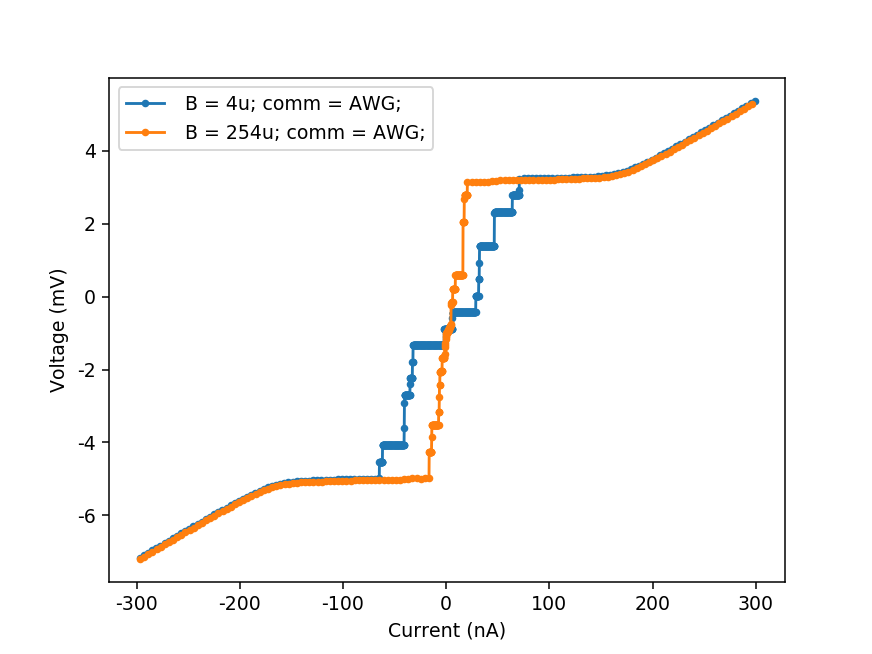

 AWG
 AWG
AWG AWG


In [299]:
exp74N4 = Exps(exp_mtx)




# exp74N4.plot({'B' : [4e-6, 254e-6], 'T' : [0.05, 0.1]})
exp74N4.plot({'B' : [4e-6, 254e-6], 'comm' : ['AWG']}, marker = '.')
# exp74N4.show_all()

## all dict version

In [410]:
np.isclose(0, 0.04, atol = 0.1)

True

type

In [505]:
class Exps():
    

    
    def __init__(self, runid_table, db):
        
        self.db = db
        
        (keys, vals) = runid_table
        
        self.exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]

        self.ids = dict()
        for exp in self.exps:
            for j, idx in enumerate(exp['ids']):


                self.ids[idx]= dict()
                for key, val in exp.items():

                    if isinstance(val, Iterable) and not isinstance(val, str):

                        self.ids[idx][key] =  val[j] 

                    else:

                        self.ids[idx][key] =  val
                        
                if 'cos' in self.ids[idx].keys():
                    self.ids[idx]['B'] = self._get_B (idx)
                elif 'B' in runid_dict[idx].keys():
                    self.ids[idx]['cos'] = self._get_cos (idx)
                        

    def db_connect(self):

        path = self.db
        qc.config["core"]["db_location"] = path
        
        
    def _get_cos(self, idx):
        
        exp = self.ids[idx]
        cos = np.cos(np.pi*(exp['B'] - exp['ZF'] )/2/ (exp['FF'] - exp['ZF']))
        return  np.round(abs( cos ), decimals = 2)

    
    def _get_B(self, idx):
        
        exp = self.ids[idx]
        B = 2*(exp['FF'] - exp['ZF'])*np.arccos(exp['cos'])/np.pi + exp['ZF']

        return  np.round(abs(B), decimals = 2)

    def show_all(self):


        idx = self.exps[0]['ids'][0]
        keys = self.ids[idx].keys()
        l=''
        for key in keys:
            l +=  ' '+ str(key)+'\t'
        print(l + '\n')
            
        for exp in self.exps:
            l = ''
            id0 = exp['ids'][0]
            id1 = exp['ids'][-1]

            for key in keys:
                
                if self.ids[id0][key] == self.ids[id1][key]:
                    
                    l +=  ' '+ eng_string(self.ids[id0][key])+'\t'
                else:
                    l +=  ' '+ eng_string(self.ids[id0][key])+'-'+eng_string(self.ids[id1][key])+'\t'
            print (l)   
            


    def find_by_single_cond( self, param, value ) :

        def isclose_float_or_str(a,b, atol = 1e-8):
            if isinstance(a, str) or isinstance(b, str) :
                if  (a in b)  :
                    return True
            else:
                return np.isclose(a, b, atol = atol)

        cond_ids = set(idx for idx in self.ids.keys() if isclose_float_or_str(value, self.ids[idx][param]) )


        if len(cond_ids) == 0:   # if there's no exact matching - find closest
            all_vals = np.array([ exp[param] for exp in self.ids.values() ] )
            atol = abs( min( all_vals - value ) )

            cond_ids = set(idx for idx in self.ids.keys() 
                           if isclose_float_or_str(self.ids[idx][param], value, atol = atol) )
        
        return cond_ids
    
    
     
    def find(self, which ) :  #like ['T':.1, 'cos':[0.1, 0.2]]
        
        def make_iterable( val ):
            
            if isinstance(val, Iterable) and not isinstance(val, str):   # if cannot iterate - make iterable
                vals = val 
            else:
                vals = list([val])
            return vals
        
        
        self.db_connect()
            
        list_cond_ids = []

        for wh_k, wh_v in which.items():
            
            wh_vs = make_iterable( wh_v )
            
            union_cond_ids = set()
            
            for wh_v_ in wh_vs:
                
                union_cond_ids = union_cond_ids.union(self.find_by_single_cond( wh_k, wh_v_ ))
                    
            list_cond_ids.append( union_cond_ids ) 
            
        out = set.intersection(*list_cond_ids)
            
        return  out
    
    
    
    def _make_label(self, idx, which):
        lab = ''
        for key in which.keys():
            
            val = self.ids[idx][key]
            if not isinstance(val, str):
                val = eng_string(val)
#                 val = '{:.2e}'.format(val)
            lab += ' {:s} = {:s};'.format(key, val)
            
        return lab
    
        
    
    def plot(self, which, ax = None, N = None,  **kw ):
        
        if  ax is None:
            fig, ax = plt.subplots()
            
        ids = self.find(which)
        
        for idx in ids:
            
            lab = self._make_label(idx, which)
            
            if N is None:

                plot_by_id(idx, axes = ax, label = lab ,  **kw)
            else:
                I, V = self.get_Is(idx)
                ax.plot(I, V, label = lab ,  **kw)
                
        ax.legend()
        
        return ax
    
    def get_Is(self, idx,  dy = 300e-6, Voff = -0.55e-3):
        
        I, V = xy_by_id(idx)
        V-= Voff
        I, V = cut_dxdy(I, V, dx = 50e-9 ,dy = dy)
        
        return I,V+Voff
        
        
    
    def get_param( self, param, which  ):
        pass
        
        

In [440]:
ZF = 4e-6
dF = 250e-6

keys = [                  'ids', 'T',    'B',                                  'ZF',   'FF', 'comm'        ]  
valss = [[range(  22,   42+1),  50e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-6, 224e-6, 'AWG'                ],  
         [range(  43,   63+1), 100e-3, np.linspace(ZF, ZF + 1.0*dF, 21)    ,   4e-6, 224e-6, ''                ]]  
#          [range( 490,  540+1), 225e-3, np.linspace(ZF, ZF + 1.0*dF, 51)    ,   4e-6, 224e-6, 'AWG'   ]] 

runid_table = (keys, valss) 

In [506]:
SAMPLE = '74N4'

db = os.getcwd() + '\..\ExdData\Experiments_{}.db'.format(SAMPLE)



exp74N4 = Exps(runid_table, db)


exp74N4.find({'cos' : [0.0 ], 'T' : [0.05, 0.1] })


# exp74N4.plot({'cos' : [0.0], 'comm' : 'A'}, N=0, marker = 'o')


exp74N4.show_all()

 ids	 T	 B	 ZF	 FF	 comm	 cos	

 22-42	 0.05	 4u-254u	 4u	 224u	 AWG	 1-0.21	
 43-63	 0.1	 4u-254u	 4u	 224u	 	 1-0.21	


In [385]:
exp74N4.ids[39]['cos']

0.05

# Class Sample


In [14]:
class Sample(Exps):
    
    def __init__(self, passport : Tuple[str, int], RunIdMrx : List, db : str ) -> None:
        
        super(RunIdMartix)
        self.db = db
        

        
    def fill_exp_matrix(self):

        self.exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]
        pass

    
    
    def fill_passp(self, passport = None ):
            pass
    
    
    def connect_db(self):
        
        qc.config["core"]["db_location"] = os.getcwd() + self.db
        
    

        

# Bckup

In [ ]:
#     def add_data(self, line):
        
#         self.exps.append(line)                
                
#     def show(self, which = 'all'):
#         if  which == 'all':
#             pass
            
#         elif isinstance(which, dict):
            
#             for k, v in which.items:
#                 pass

In [168]:
class Exps():
    
    def __init__(self, RunIdMrx = None):
        
        self.exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]
        
      
    def find(self, **which ) :  #like ['T':.1, 'cos':[0.1, 0.2]]
        
        def find_by_single_cond( exp, param, value ) :
            
            id_list = []
            
            ind =  np.isclose(exp[param], value)

            if isinstance(ind, np.ndarray):  #check if ind is array (so we look for diff var like B)
                id_list = [idx for i, idx in zip(ind, exp['ids']) if i]#  exp['ids'][ind]
            elif ind:
                id_list = exp['ids']        #if not means we look for single value var like T

            
            label = '{:s} = {:s}'.format(param, str(value))
            out =  {idx:label for idx in id_list}
#             print (out)
            
            return out #set(id_list )
        
        
        list_id_sets = []

        for k, v in which.items():
            
            id_set = set()
            
            if isinstance(v, Iterable):   # if cannot iterate - make iterable
                vs = v 
            else:
                vs = list([v])
                
            for v_ in vs:
                for exp in self.exps:
                    single_id_set = find_by_single_cond( exp, k, v_ )
                    
                    id_set = id_set.union(single_id_set)
                
            list_id_sets.append(id_set) 
            

        return  set.intersection(*list_id_sets)
    
    
    
    def plot(self, which, ax = None, **kw ):
        
        if  ax is None:
            fig, ax = plt.subplots()
            
        ids = self.find(**which)
        
        for idx in ids:
            plot_by_id(idx, axes = ax, **kw)
            


In [21]:
a = np.array([5,5,4])

ind = np.isclose(a,[5])

indl = ind.tolist()

a[ind]

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [ ]:
exp = {'ids' : [490, 540], 'T': 450e-3, 'B':[0, 220e-6, 51], 'comment' : 'tydyn'}

In [6]:
keys = [  'ids',   'Tb',            'B',      'comments'  ]  
valss =[  
       [ range(100,111), 100e-3,    np.linspace(0, 1, 2) ,     ''     ],
       [ range(111,121), 200e-3,    np.linspace(1, 2, 2) ,     ''     ]
       ]

exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]

db = pd.DataFrame(exps)

In [9]:
db[db.B == 1]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [92]:
keys = [  'ids',   'T',       'B',      'comments'  ]  
valss =[  
       [ [1,2],  100e-3,    [1,2,3] ,     'lala'     ],
       [ [1,2],  200e-3,    [1,2,3] ,     'trulala'     ]
       ]

exps = [{ key : val for key, val in zip(keys, vals)  }  for vals in valss ]

pd_exps = pd.DataFrame(exps)

In [137]:
exp = db [db.Tb == .1]

db.T.to_dict()[0]

{'B': array([0., 1.]), 'Tb': 0.1, 'comments': '', 'ids': range(100, 111)}

In [139]:
db.T

,0,1
B,"[0.0, 1.0]","[1.0, 2.0]"
Tb,0.1,0.2
comments,,
ids,"(100, 101, 102, 103, 104, 105, 106, 107, 108, ...","(111, 112, 113, 114, 115, 116, 117, 118, 119, ..."


In [23]:
not isinstance(exp, list)

True

In [22]:
tup = (0, 100, 51)

if  isinstance(tup, tuple):
    
    if len(tup) == 2:
        print( range(tup[0],tup[1]+1 )) 

    if len(tup) == 3:
        print( np.linspace(tup[0],tup[1], tup[2] )) 
        

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100.]


In [28]:
dates = pd.date_range('20130101', periods=6)
exps = pd.DataFrame(np.random.randn(6, 4), index = dates, columns= keys )

In [53]:
exps = pd.DataFrame(np.round(10*np.random.randn(4, 4)), index = [1,2,3,4], columns= list('abcd') )

In [63]:
exps[exps.a == 9]

,a,b,c,d
3,9.0,-7.0,3.0,11.0


2    6.0
3   -7.0
Name: b, dtype: float64

In [47]:
a = [{'ids': range(0, 11),  'T': 1 , 'B': np.linspace(0, 1, 11)},
     {'ids': range(12, 21), 'T': 2 , 'B': np.linspace(1, 2, 11)}]

In [48]:
f = pd.DataFrame(a)

In [50]:
f


,B,T,ids
0,"[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",1,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)"
1,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.70000000...",2,"(12, 13, 14, 15, 16, 17, 18, 19, 20)"


In [49]:
f['ids']

0      (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
1    (12, 13, 14, 15, 16, 17, 18, 19, 20)
Name: ids, dtype: object

In [4]:

def populate_exps (exps, ZF_ = .000e-3, FF_ = .21e-3, VERBOSE = False,
                   N = 0, Gap = 437e-6, dy = 30e-6):

    texps = tqdm_notebook(exps)
    for exp in texps:

        Isws_n = [ [ ] for i in range (N+1)]
        R0s_n =  [ [ ] for i in range (N+1)]

        if VERBOSE:
            fig, ax = plt.subplots()

        Is_n = [ [ ] for i in range (N+1)]
        Vs_n = [ [ ] for i in range (N+1)]


        for i in exp['ids']:
            
            I, V = xy_by_id(i)

            I = np.array_split(I,2)[0]
            V = np.array_split(V,2)[0]
            
            Tb = exp['T']

            for n in range(N+1):
                
                I_cut, V_cut = cut_dxdy(I, V - n*Gap, 
                                        dx = 250e-9 ,dy = dy)


                if VERBOSE:
                    ax.plot(I_cut, V_cut + n*Gap, 'o')

                Isw, R0 = extract_Isw_R0 (I_cut, V_cut)
            
                Isws_n[n].append(Isw)
                R0s_n[n].append(R0)
                
                Is_n[n] = I
                Vs_n[n] = V
            


            exp ['Is_n' ] =  Is_n
            exp ['Vs_n' ] =  Vs_n

            exp ['Isws' ] =  Isws_n[0]
            

            exp ['Isws_n'] = Isws_n 
            exp ['R0s_n' ] =  np.array(R0s_n )


        exp ['cos' ] =  np.array( abs(np.cos(np.pi*(exp['B'] - ZF_ )/(2* (FF_ - ZF_)  )) ) )


<IPython.core.display.Javascript object>


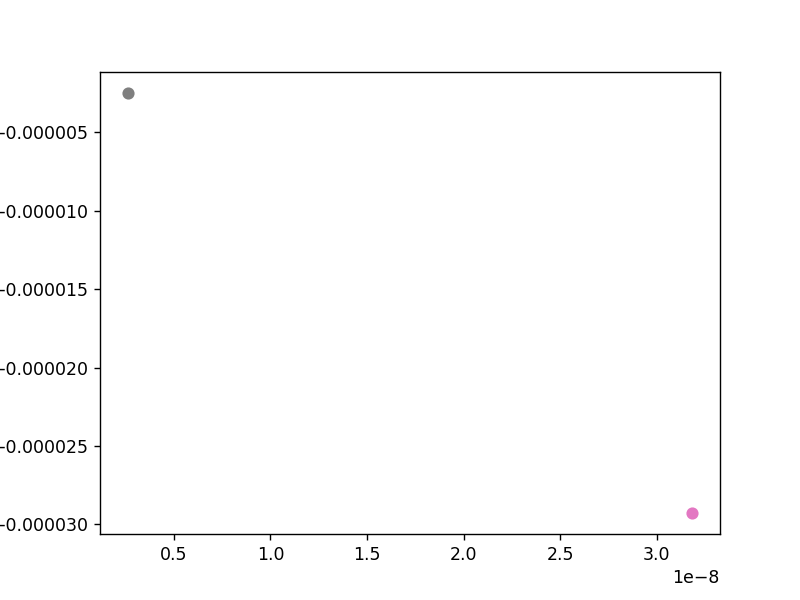

<IPython.core.display.Javascript object>


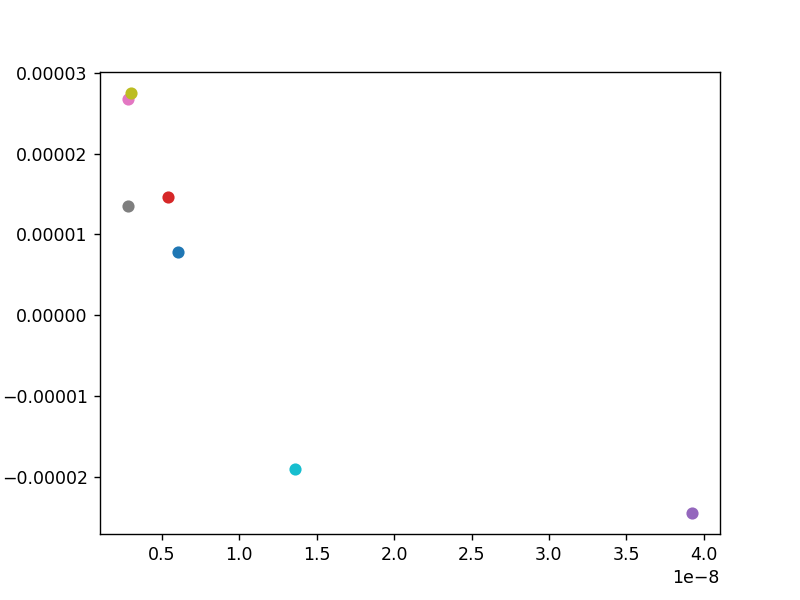

<IPython.core.display.Javascript object>


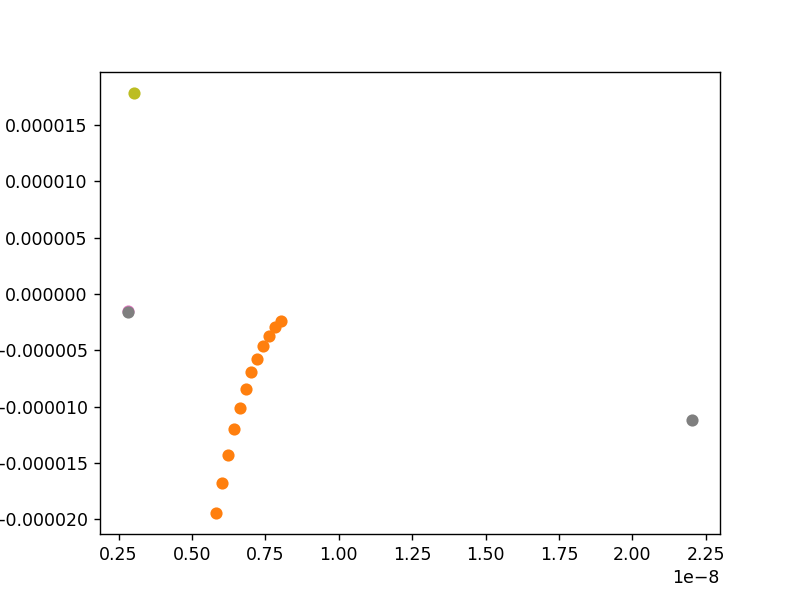

<IPython.core.display.Javascript object>


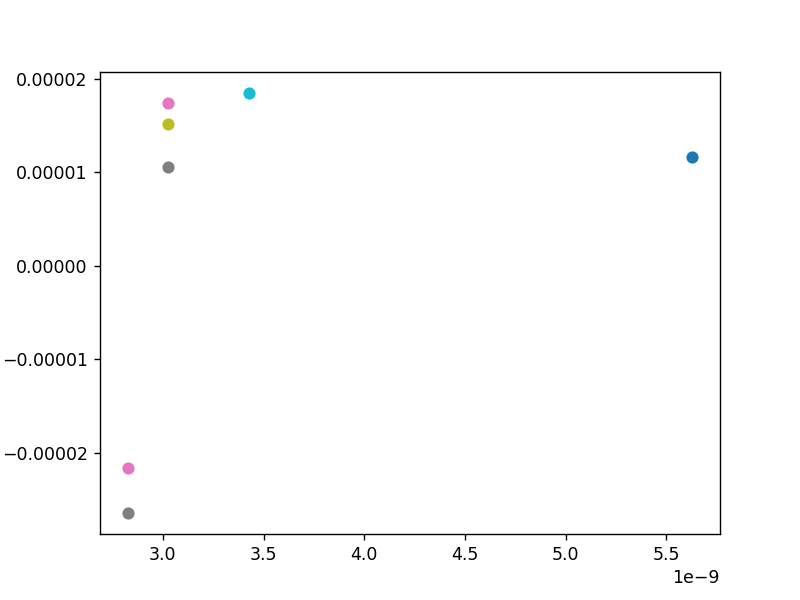

<IPython.core.display.Javascript object>


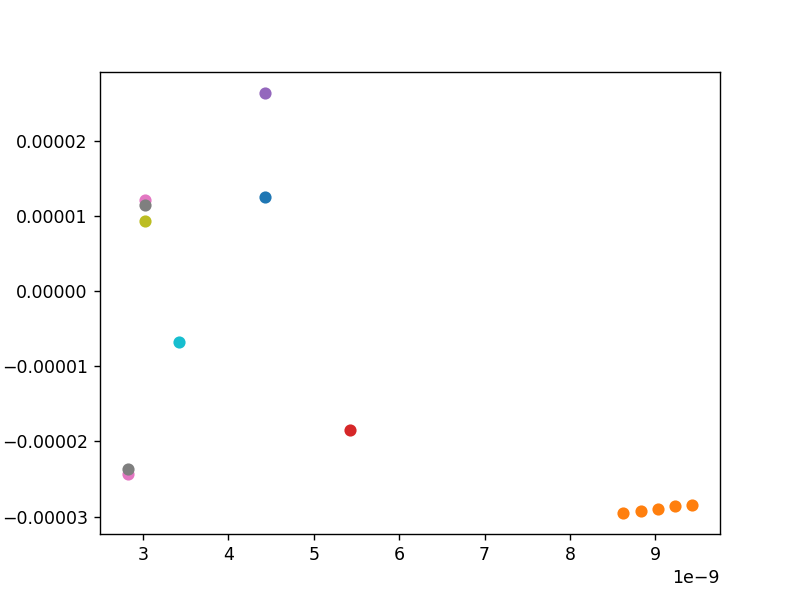

<IPython.core.display.Javascript object>


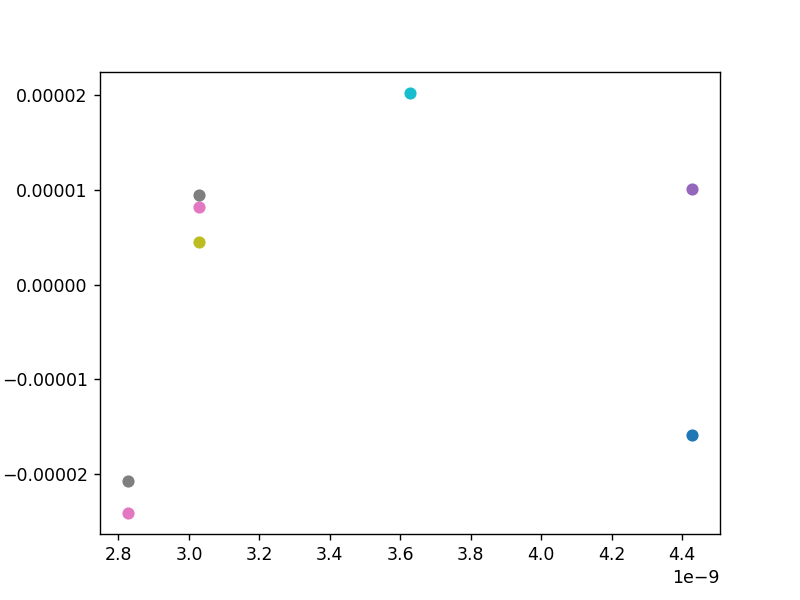

<IPython.core.display.Javascript object>


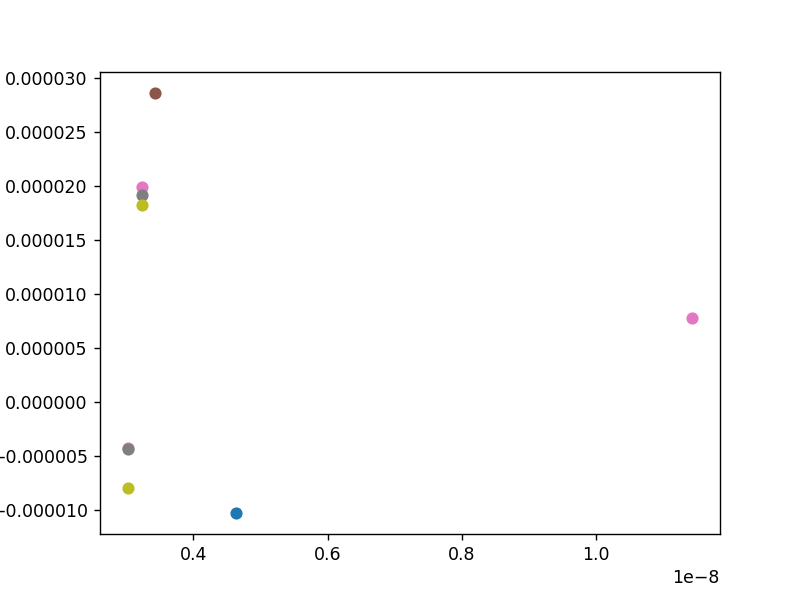

<IPython.core.display.Javascript object>


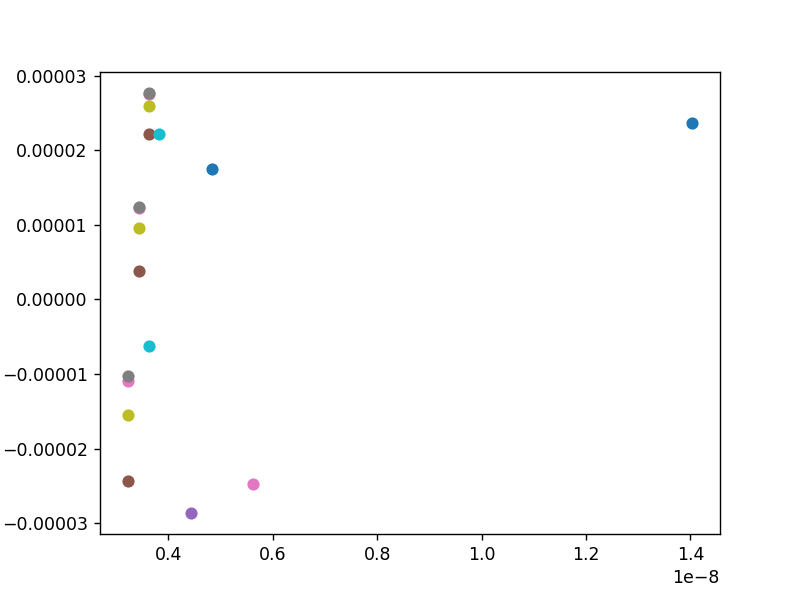

<IPython.core.display.Javascript object>


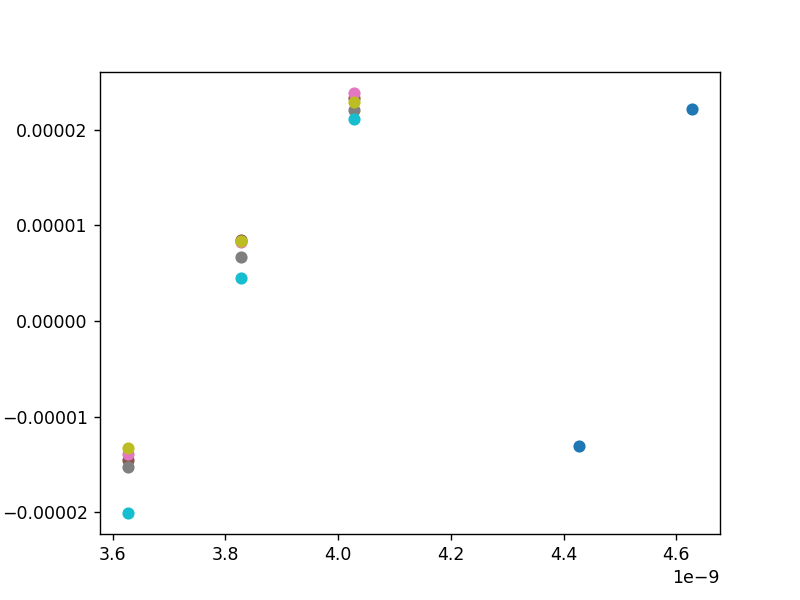

<IPython.core.display.Javascript object>


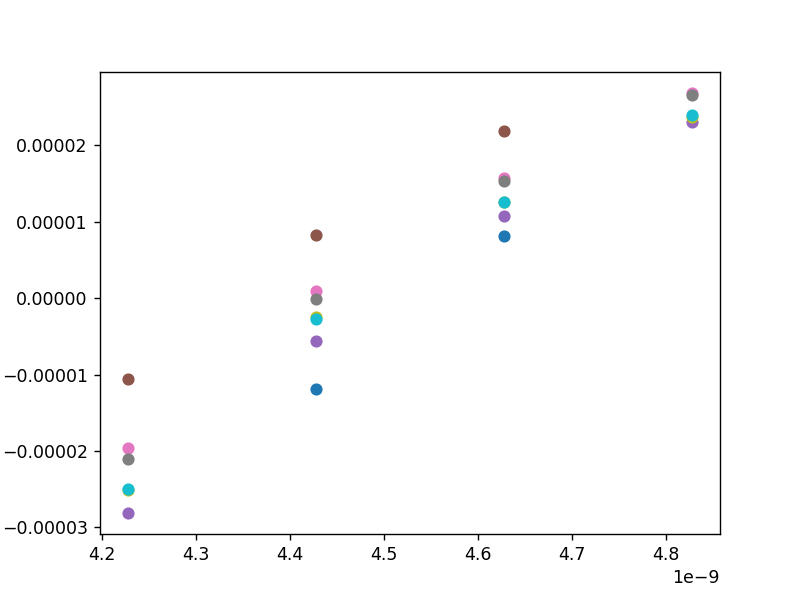

<IPython.core.display.Javascript object>


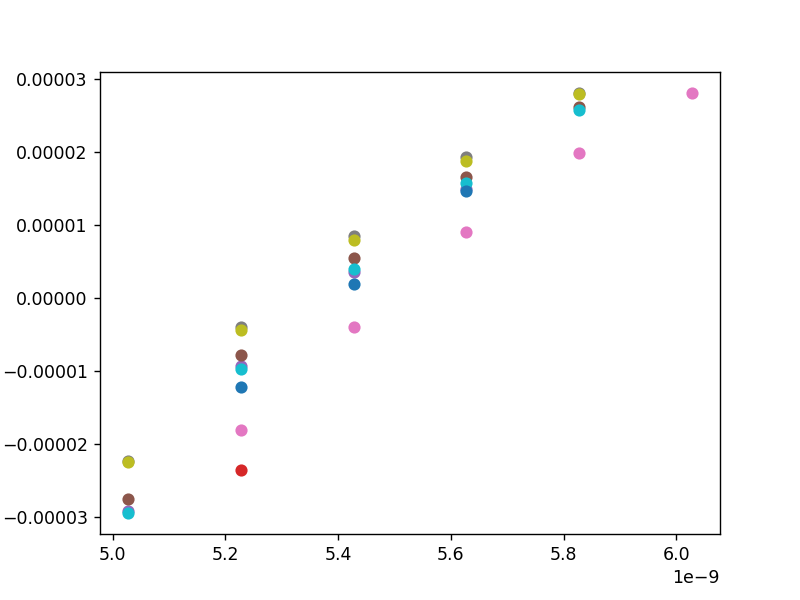

<IPython.core.display.Javascript object>


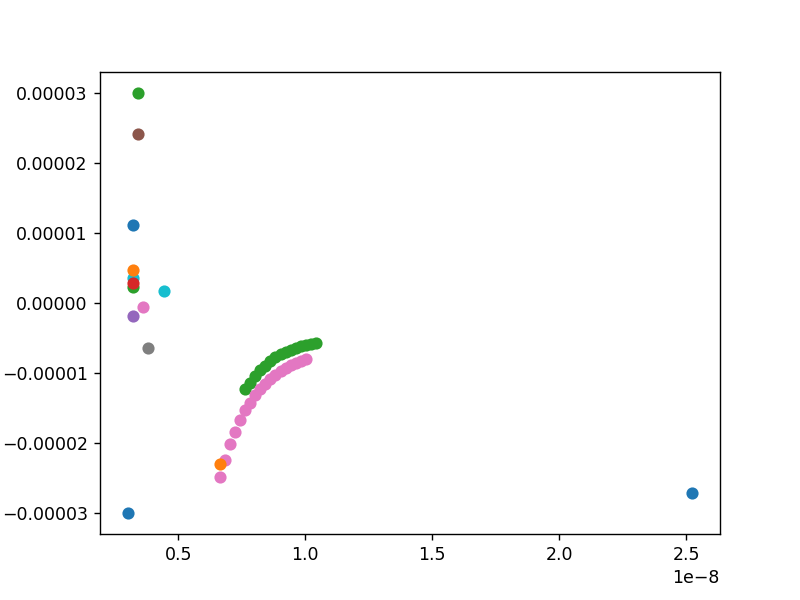

<IPython.core.display.Javascript object>


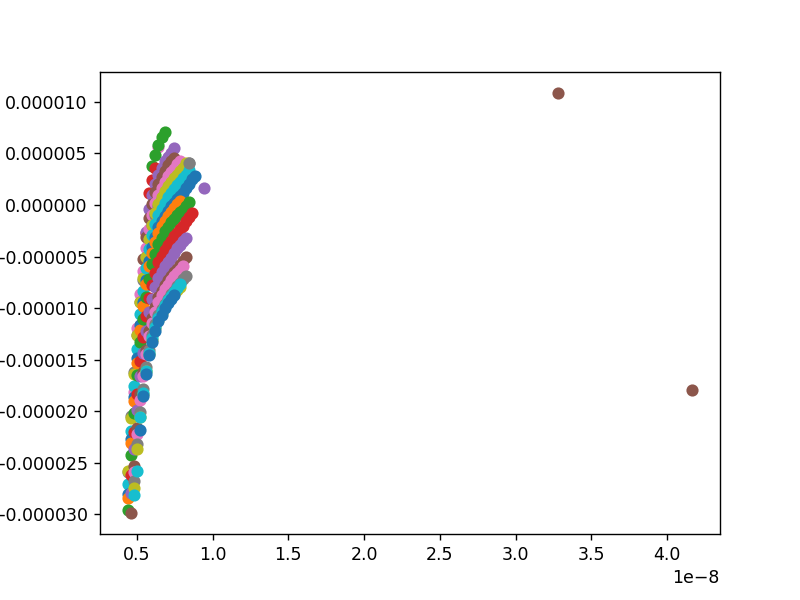

<IPython.core.display.Javascript object>


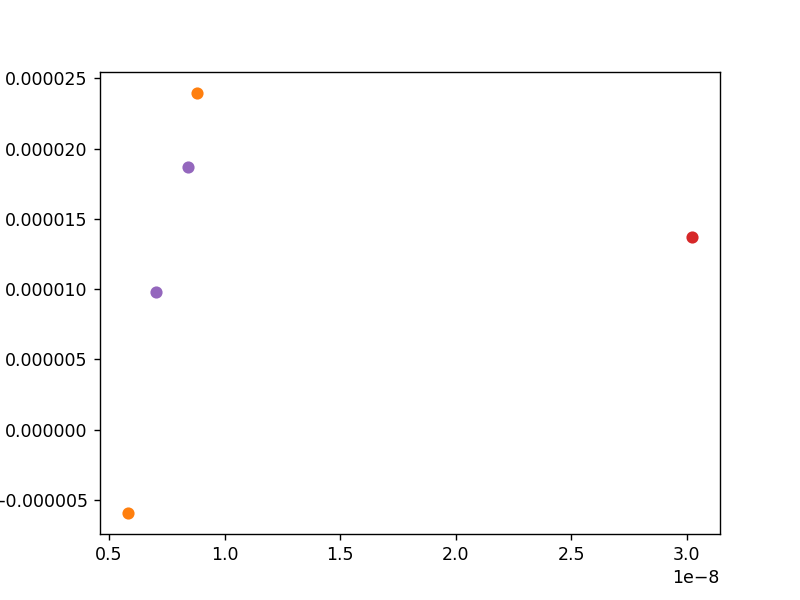

<IPython.core.display.Javascript object>


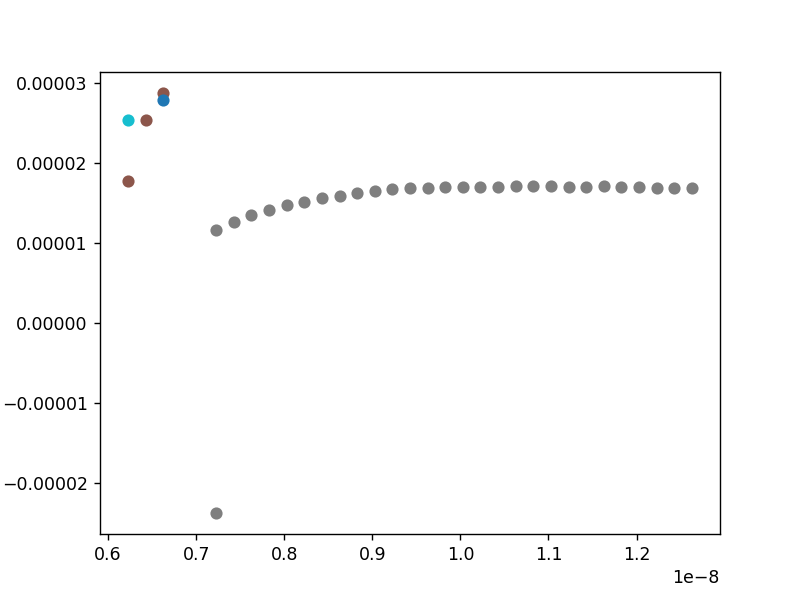

<IPython.core.display.Javascript object>


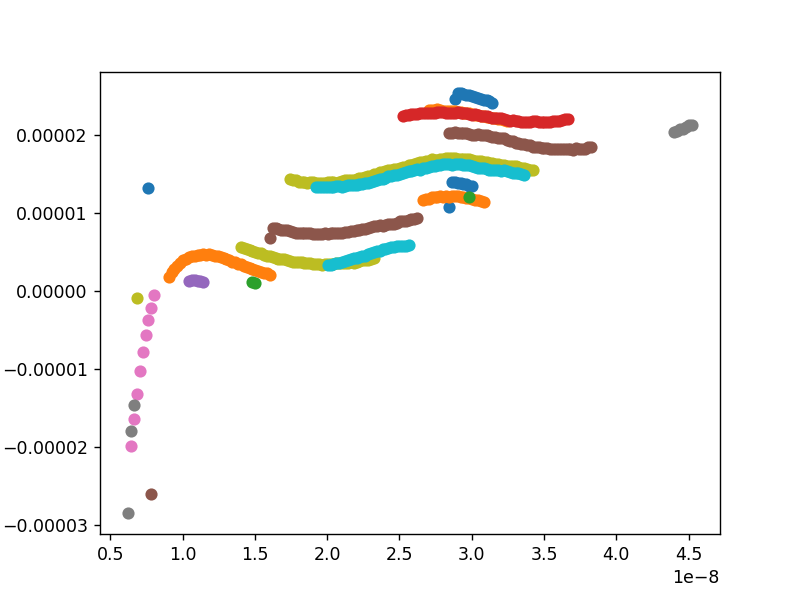

In [13]:
populate_exps (exps, VERBOSE = True)

<IPython.core.display.Javascript object>


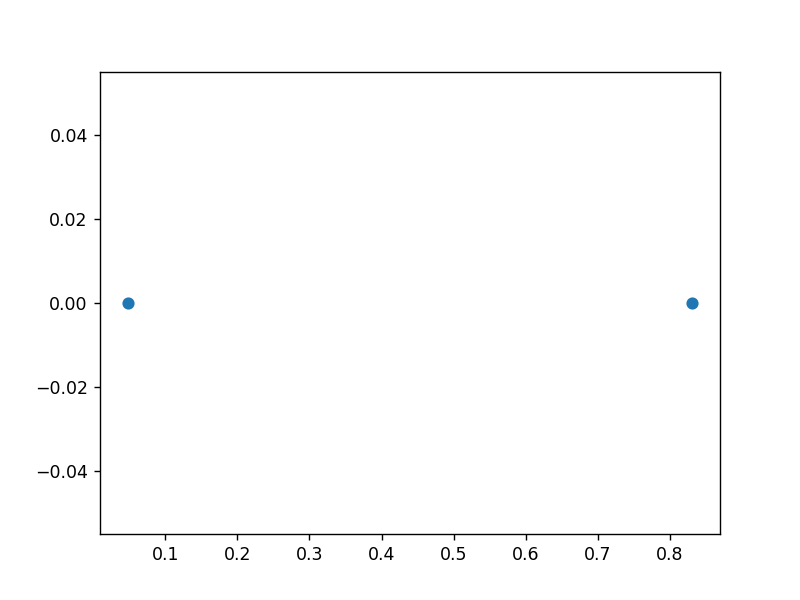

In [12]:
fig, ax = plt.subplots()

exp = exps[0]


ax.plot(exp ['cos' ] , exp['Isws_n'][0], 'o-', label = 'Isw')